In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

def initialize_centers(X,K):
    C = []
    for i in range(K):
        C_x = np.random.random_sample()
        C_y = np.random.random_sample()
        C_z = np.random.random_sample()
        C.append([C_x,C_y,C_z])
    return C

def find_closest_centers(X,C):
    idx = []
    for d in X:
        bestDist = np.Infinity
        bestIndex = -1
        for i in range(len(C)):
            center = C[i]
            dist = np.linalg.norm(d-center)
            if dist < bestDist:
                bestDist = dist
                bestIndex = i
        idx.append(bestIndex)
    return idx

def compute_means(X,idx,K,C):
    sumc = np.zeros((K,3))
    count = np.zeros(K)
    for i in range(len(X)):
        d = X[i]
        di = idx[i]
        sumc[di] = [sumc[di][0] + d[0],sumc[di][1] + d[1],sumc[di][2] + d[2]]
        count[di] += 1
    newcenters = np.zeros((K,3))
    for i in range(K):
        if count[i] != 0:
            newcenters[i] = [sumc[i][0] / count[i],sumc[i][1] / count[i],sumc[i][2] / count[i]]
        else:
            newcenters[i] = C[i]
    return newcenters

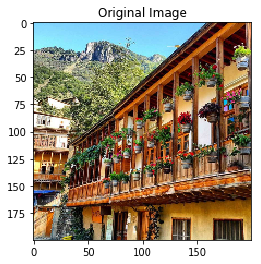

In [7]:
img = image.imread('imageSmall.png')
plt.title("Original Image")
plt.imshow(img)
plt.show()

In [5]:
sh = np.shape(img)
pixel_data = []
for i in range(sh[0]):
    for j in range(sh[1]):
        pixel_data.append(img[i,j,:])

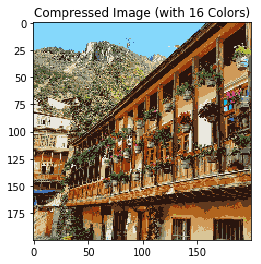

In [8]:
#KMeans
data = pixel_data
k = 16
n = 4
centers = initialize_centers(data,k)
for i in range(n):
    idx = find_closest_centers(data,centers)
    centers = compute_means(data,idx,k,centers)
    
#Replace colors
comp_pixel_data = []
for i in range(len(data)):
    di = idx[i]
    new_pixel = centers[di]
    comp_pixel_data.append(new_pixel)
    
#reconstruct image
new_img = np.array(img,copy=True)
npc = 0
for i in range(sh[0]):
    for j in range(sh[1]):
        new_img[i,j] = comp_pixel_data[npc]
        npc += 1

plt.title("Compressed Image (with 16 Colors)")
plt.imshow(new_img)
plt.show()